# MLP on MCR & MT Data

11 - 02 - 2023 | updates

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file = r'/content/drive/MyDrive/Colab/microservice-prediction/dataset.csv'

Data

In [3]:
import pandas as pd
import numpy as np
df  = pd.read_csv(file)
dataset = df.values
print('Total number of rows:', df.shape[0]) #940520
X = dataset[:, 6] # mt column
print(np.min(X)," ",np.max(X))
Y = dataset[:, 5] # mcr column
print(np.min(Y)," ",np.max(Y))

Total number of rows: 179996
0.01   5858.833333333333
0.0253444780071999   4874.2


Correlation

In [4]:
from scipy.stats import pearsonr

corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.752


Scatter

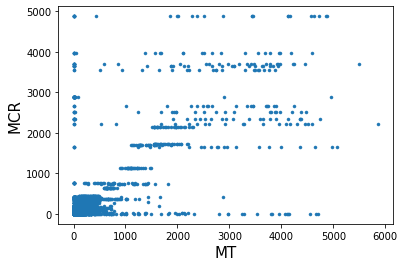

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x=X, y=Y, marker=".", linewidth=0.5)
#plt.title('Data')
plt.ylabel('MCR', fontsize=15)
plt.xlabel('MT', fontsize=15)
plt.show()

Reshape + Split

In [6]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

Multilayer Perceptron Regression Model

In [7]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver="adam", alpha=0.001, activation="relu",
                           learning_rate="constant",
                           learning_rate_init=0.00005,
                           hidden_layer_sizes=(100,100),
                           max_iter=5000)

Preprocess + Fit + Predict

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), mlp)
pipe.fit(X_train, Y_train)
Y_predict = pipe.predict(X_test)

Plot

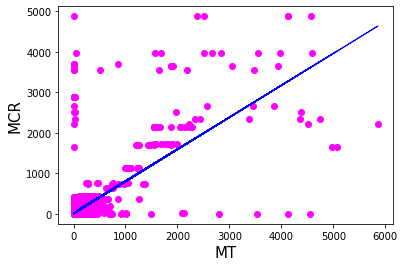

In [9]:
# plot
plt.scatter(x=X_test, y=Y_test, color="magenta")
plt.plot(X_test, Y_predict, color="blue", linewidth=1)  
plt.ylabel('MCR', fontsize=15)
plt.xlabel('MT', fontsize=15)
plt.show()

Error

In [10]:
from sklearn.metrics import mean_absolute_error
print("MAE : ", mean_absolute_error(Y_test, Y_predict))

MAE :  11.295380515945327


Graph

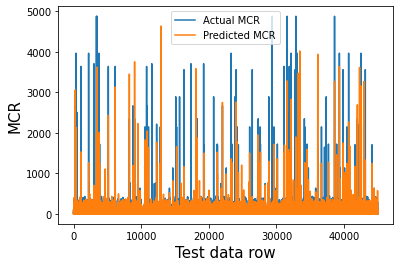

In [11]:
plt.plot(Y_test, label='Actual MCR')  # actual plot
plt.plot(Y_predict, label='Predicted MCR')  # predicted plot
plt.ylabel('MCR', fontsize=15)
plt.xlabel('Test data row', fontsize=15)
plt.legend()
plt.show()